In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score,precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Student prediction data\students.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
X = df.drop('Target',axis=1)
y = df['Target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)

In [31]:
#Scaling of the features is important for Logistic Regression. We will scale the features and apply SMOTE and ADASYN to balance the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote_log = SMOTE(random_state=42)
X_train_scaled_smote, y_train_smote = smote_log.fit_resample(X_train_scaled, y_train)

adasyn_log = ADASYN(random_state=42)
X_train_scaled_adasyn, y_train_adasyn = adasyn_log.fit_resample(X_train_scaled, y_train)

In [32]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred,average=None)
    f_score = f1_score(y_test,pred,average=None)
    conf_max = confusion_matrix(y_test,pred)
    return acc_score,recall,f_score,conf_max

In [33]:
unbalance_log = LogisticRegression(solver='saga',max_iter=100000,random_state=42)
unbalanced_acc_score,unbalanced_recall,unbalanced_f_score,conf_max_unbalanced = evaluate_model(unbalance_log,X_train_scaled,X_test_scaled,y_train,y_test)

smote_log = LogisticRegression(solver='saga',max_iter=100000,random_state=42)
smote_acc_score,smote_recall,smote_f_score,conf_max_smote = evaluate_model(smote_log,X_train_scaled_smote,X_test_scaled,y_train_smote,y_test)

adasyn_log = LogisticRegression(solver='saga',max_iter=100000,random_state=42)
adasyn_acc_score,adasyn_recall,adasyn_f_score,conf_max_adasyn = evaluate_model(adasyn_log,X_train_scaled_adasyn,X_test_scaled,y_train_adasyn,y_test)

print(f'Accuracy score unbalanced: {unbalanced_acc_score}')
print(f'Recall score unbalanced: {unbalanced_recall}')
print(f'f1 score: {unbalanced_f_score}')
print(f'confusion matrix for unbalanced: {conf_max_unbalanced}')
print('\n')

print(f'Accuracy score smote: {smote_acc_score}')
print(f'Recall score smote: {smote_recall}')
print(f'f1 score smote: {smote_f_score}')
print(f'confusion matrix for smote:{conf_max_smote}')
print('\n')

print(f'Accuracy score adasyn: {adasyn_acc_score}')
print(f'Recall score unbalanced: {adasyn_recall}')
print(f'f1 score adasyn: {adasyn_f_score}')
print(f'confusion matrix for adasyn: {conf_max_adasyn}')


Accuracy score unbalanced: 0.7674943566591422
Recall score unbalanced: [0.74647887 0.3875     0.91855204]
f1 score: [0.79104478 0.43971631 0.85115304]
confusion matrix for unbalanced: [[106  18  18]
 [ 14  31  35]
 [  6  12 203]]


Accuracy score smote: 0.7607223476297968
Recall score smote: [0.68309859 0.65       0.85067873]
f1 score smote: [0.76377953 0.54736842 0.85067873]
confusion matrix for smote:[[ 97  32  13]
 [  8  52  20]
 [  7  26 188]]


Accuracy score adasyn: 0.7471783295711061
Recall score unbalanced: [0.6971831  0.6375     0.81900452]
f1 score adasyn: [0.75285171 0.5257732  0.84382284]
confusion matrix for adasyn: [[ 99  32  11]
 [ 13  51  16]
 [  9  31 181]]


In [34]:
#Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [35]:
rfc_unbalanced = RandomForestClassifier(random_state=42)
rfc_unbalanced_acc_score,rfc_unbalanced_recall,rfc_unbalanced_f_score,rfc_conf_max_unbalanced = evaluate_model(rfc_unbalanced,X_train,X_test,y_train,y_test)

rfc_smote = RandomForestClassifier(random_state=42)
rfc_smote_acc_score,rfc_smote_recall,rfc_smote_f_score,rfcconf_max_smote = evaluate_model(rfc_smote,X_train_smote,X_test,y_train_smote,y_test)

rfc_adasyn= RandomForestClassifier(random_state=42)
rfc_adasyn_acc_score,rfc_adasyn_recall,rfc_adasyn_f_score,rfc_conf_max_adasyn = evaluate_model(rfc_adasyn,X_train_adasyn,X_test,y_train_adasyn,y_test)

print(f'Accuracy score unbalanced: {rfc_unbalanced_acc_score}')
print(f'Recall score unbalanced: {rfc_unbalanced_recall}')
print(f'f1 score: {rfc_unbalanced_f_score}')
print(f'confusion matrix for unbalanced: {rfc_conf_max_unbalanced}')
print('\n')

print(f'Accuracy score smote: {rfc_smote_acc_score}')
print(f'Recall score smote: {rfc_smote_recall}')
print(f'f1 score smote: {rfc_smote_f_score}')
print(f'confusion matrix for smote:{rfcconf_max_smote}')
print('\n')


print(f'Accuracy score adasyn: {rfc_adasyn_acc_score}')
print(f'Recall score adasyn: {rfc_adasyn_recall}')
print(f'f1 score adasyn: {rfc_adasyn_f_score}')
print(f'confusion matrix for adasyn: {rfc_conf_max_adasyn}')

Accuracy score unbalanced: 0.7765237020316027
Recall score unbalanced: [0.76760563 0.4375     0.90497738]
f1 score: [0.7985348  0.4964539  0.84745763]
confusion matrix for unbalanced: [[109  15  18]
 [ 12  35  33]
 [ 10  11 200]]


Accuracy score smote: 0.7787810383747178
Recall score smote: [0.73943662 0.5125     0.90045249]
f1 score smote: [0.80152672 0.52229299 0.85224839]
confusion matrix for smote:[[105  19  18]
 [ 10  41  29]
 [  5  17 199]]


Accuracy score adasyn: 0.781038374717833
Recall score adasyn: [0.74647887 0.5375     0.89140271]
f1 score adasyn: [0.8       0.5308642 0.8583878]
confusion matrix for adasyn: [[106  21  15]
 [ 11  43  26]
 [  6  18 197]]


In [36]:
errors = []
misclass = []

for n in range(1,30):
    rfc_model = RandomForestClassifier(n_estimators=n,random_state=42)
    rfc_model.fit(X_train_smote,y_train_smote)
    predictions = rfc_model.predict(X_test)
    errors.append(1-accuracy_score(y_test,predictions))
    misclass.append(np.sum(predictions != y_test))

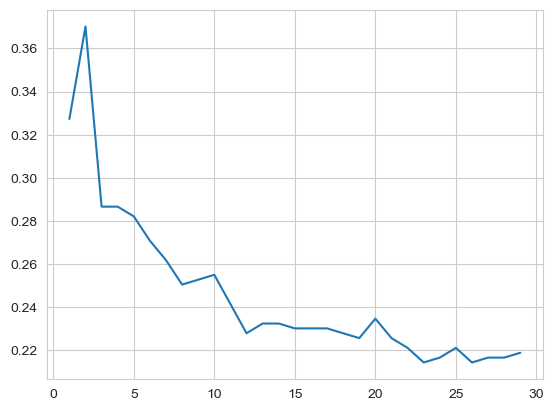

In [37]:
plt.plot(range(1,30),errors)

In [39]:
rfc_unbalanced = RandomForestClassifier(n_estimators=23,random_state=42)
rfc_unbalanced_acc_score,rfc_unbalanced_recall,rfc_unbalanced_f_score,rfc_conf_max_unbalanced = evaluate_model(rfc_unbalanced,X_train,X_test,y_train,y_test)

rfc_smote = RandomForestClassifier(n_estimators=23,random_state=42)
rfc_smote_acc_score,rfc_smote_recall,rfc_smote_f_score,rfcconf_max_smote = evaluate_model(rfc_smote,X_train_smote,X_test,y_train_smote,y_test)

rfc_adasyn= RandomForestClassifier(n_estimators=23,random_state=42)
rfc_adasyn_acc_score,rfc_adasyn_recall,rfc_adasyn_f_score,rfc_conf_max_adasyn = evaluate_model(rfc_adasyn,X_train_adasyn,X_test,y_train_adasyn,y_test)

print(f'Accuracy score unbalanced: {rfc_unbalanced_acc_score}')
print(f'Recall score unbalanced: {rfc_unbalanced_recall}')
print(f'f1 score: {rfc_unbalanced_f_score}')
print(f'confusion matrix for unbalanced: {rfc_conf_max_unbalanced}')
print('\n')

print(f'Accuracy score smote: {rfc_smote_acc_score}')
print(f'Recall score smote: {rfc_smote_recall}')
print(f'f1 score smote: {rfc_smote_f_score}')
print(f'confusion matrix for smote:{rfcconf_max_smote}')
print('\n')


print(f'Accuracy score adasyn: {rfc_adasyn_acc_score}')
print(f'Recall score adasyn: {rfc_adasyn_recall}')
print(f'f1 score adasyn: {rfc_adasyn_f_score}')
print(f'confusion matrix for adasyn: {rfc_conf_max_adasyn}')

Accuracy score unbalanced: 0.7900677200902935
Recall score unbalanced: [0.8028169  0.4375     0.90950226]
f1 score: [0.80851064 0.50724638 0.86266094]
confusion matrix for unbalanced: [[114  15  13]
 [ 14  35  31]
 [ 12   8 201]]


Accuracy score smote: 0.7855530474040632
Recall score smote: [0.71830986 0.6125     0.89140271]
f1 score smote: [0.77862595 0.57988166 0.86593407]
confusion matrix for smote:[[102  23  17]
 [ 11  49  20]
 [  7  17 197]]


Accuracy score adasyn: 0.781038374717833
Recall score adasyn: [0.73239437 0.575      0.88687783]
f1 score adasyn: [0.77902622 0.56441718 0.85964912]
confusion matrix for adasyn: [[104  21  17]
 [ 12  46  22]
 [  9  16 196]]


In [40]:
#lg_model = LogisticRegression(solver='saga',multi_class='ovr',class_weight='balanced',max_iter=100000)
#lg_model.fit(X_train,y_train)
#pred= lg_model.predict(X_test)
#print(classification_report(y_test,pred))